# Narrative analytics and experimentation project

### Goal
The goal of this notebook is to perform an exploratory analysis of the Mount Rainier climbing data from https://www.kaggle.com/codersree/mount-rainier-weather-and-climbing-data. After exploring the data and identifying potential trends, we will form a hypothesis related to climbing the mountain. Next, we will contruct a research proposal, outining an A/B test that could be used to evaluate the plausibility of our hypothesis.

### Data
The data are taken from Kaggle and consist of two csv files: climbing_statistics.csv and Rainier_Weather.csv. The first file was obtained from http://www.mountrainierclimbing.us/routes. It documents climbing parties which attempted to summit Rainier in 2014-2105 and whether they were successful. The second file was taken from https://www.nwac.us and contains weather data from the mountain during the same time.

## 1. Data Exploration
### i. Climbing Data

In [1]:
# import the standard libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# load in the data
climb_data = pd.read_csv('climbing_statistics.csv')
weather_data = pd.read_csv('Rainier_weather.csv')

In [2]:
# take a peek at the climbing data
climb_data.head()

,Date,Route,Attempted,Succeeded,Success Percentage
0,11/27/2015,Disappointment Cleaver,2,0,0.0
1,11/21/2015,Disappointment Cleaver,3,0,0.0
2,10/15/2015,Disappointment Cleaver,2,0,0.0
3,10/13/2015,Little Tahoma,8,0,0.0
4,10/9/2015,Disappointment Cleaver,2,0,0.0


Each entry corresponds to an ascent route on a specific day, and records how many people attempted to summit and how many succeed. One thing the data could tell us is which routes are the easiest. Let's group the data by route and compute each overall success ratio.

In [3]:
# first let's see a list of all the routes
for route in np.sort(climb_data['Route'].unique()):
    print(route)

Curtis RIngraham Directge
Disappointment Cleaver
Edmonds HW
Emmons-Winthrop
Fuhrer's Finger
Fuhrers Finger
Gibralter Chute
Gibralter Ledges
Ingraham Direct
Kautz Cleaver
Kautz Glacier
Kautz Headwall
Liberty RIngraham Directge
Liberty Wall
Little Tahoma
Mowich Face
Nisqually Glacier
Ptarmigan RIngraham Directge
Success Cleaver
Sunset Amphitheater
Sunset RIngraham Directge
Tahoma Cleaver
Tahoma Glacier
Unknown
Wilson Headwall
glacier only - no summit attempt


Looks like we'll have to do a bit of data cleaning. For each route containing "Ridge" in it's name, the letter "i" has been replaced with "Ingraham" and the letter "d" has been replaced with "Direct."

The other issue that needs to be addressed is the Fuhrer's/Fuhrers Finger discrepancy. A quick Google search reveals the correct name is actually "Fuhrer Finger."

In [4]:
climb_data.loc[climb_data['Route']=='Liberty RIngraham Directge', 'Route'] = 'Liberty Ridge'
climb_data.loc[climb_data['Route']=='Ptarmigan RIngraham Directge', 'Route'] = 'Ptarmigan Ridge'
climb_data.loc[climb_data['Route']=='Sunset RIngraham Directge', 'Route'] = 'Sunset Ridge'
climb_data.loc[climb_data['Route']=='Curtis RIngraham Directge', 'Route'] = 'Curtis Ridge'
climb_data.loc[(climb_data['Route']=='Fuhrer\'s Finger') | (climb_data['Route']=='Fuhrers Finger'), 'Route'] = 'Fuhrer Finger'
# view the clean list of routes to ensure there are no more issues
for route in np.sort(climb_data['Route'].unique()):
    print(route)

Curtis Ridge
Disappointment Cleaver
Edmonds HW
Emmons-Winthrop
Fuhrer Finger
Gibralter Chute
Gibralter Ledges
Ingraham Direct
Kautz Cleaver
Kautz Glacier
Kautz Headwall
Liberty Ridge
Liberty Wall
Little Tahoma
Mowich Face
Nisqually Glacier
Ptarmigan Ridge
Success Cleaver
Sunset Amphitheater
Sunset Ridge
Tahoma Cleaver
Tahoma Glacier
Unknown
Wilson Headwall
glacier only - no summit attempt


In [5]:
climb_data_by_route = climb_data.groupby('Route').sum()
climb_data_by_route['Success Percentage'] = climb_data_by_route['Succeeded'] / climb_data_by_route['Attempted']
climb_data_by_route

,Attempted,Succeeded,Success Percentage
Route,,,
Curtis Ridge,4,2,0.500000
Disappointment Cleaver,15259,8353,0.547415
Edmonds HW,4,0,0.000000
Emmons-Winthrop,3048,1673,0.548885
Fuhrer Finger,273,88,0.322344
Gibralter Chute,13,2,0.153846
Gibralter Ledges,199,58,0.291457
Ingraham Direct,225,16,0.071111
Kautz Cleaver,51,16,0.313725


Some of these samples are quite small and there are too many routes to make a clean visual, so let's limit our graph to routes with at least 100 attempts. Also let's drop the 'Unknown' and 'glacier only' routes.

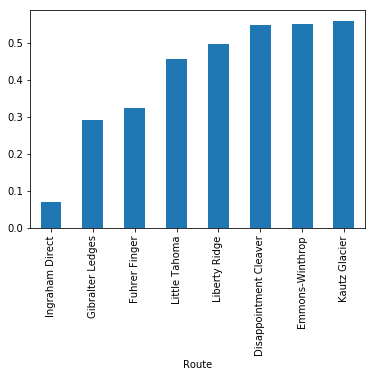

In [6]:
climb_data_by_route.loc[climb_data_by_route['Attempted'] >= 100,'Success Percentage'].drop(
    index=['Unknown','glacier only - no summit attempt']).sort_values().plot.bar()
plt.show()

This bar graph suggests that Disappointment Cleaver, Emmons-Winthrop, and Kautz Glacier are among the easiest routes while Ingraham Direct is by far the hardest. From the mountaineering website summitpost.org's description of Ingraham Direct: "Along with Gibralter Ledges, the Ingraham Glacier Direct is the standard route on Mount Rainier during the winter (December to the end of May). The route is quite a bit easier than Gibralter Ledges and is more direct than the Disappointment Cleaver." So we should definitely hestitate to view our bar graph as a ranking of route difficulty.

What are some of the issues with using our data to assess route difficulty? As always, we should keep in mind the standard statistical mantra: "correlation does not imply causation." Indeed, it appears that the Ingraham Direct route is correlated with low success rate, but we can't conclude it's the cause. For example, what if Ingraham Direct is the easiest route, so all of the unskilled novice mountaineers are attracted to it? This would drive down the route's success rate due to the confounding factor of climber skill. We can't know in this case because there is no "climber skill level" field in our data. This could actually be an interesting question to investigate for our research proposal, but we still have the weather data to explore.

Another confounding factor might be weather conditions. What if some routes are better for inclement weather, and their success rate is pulled down because they are more likely to be climbed in poor conditions? One thing we could do is see if the routes are equally distributed temporally. Let's make a bar plot showing the relative popularity of each route over the months in the year.

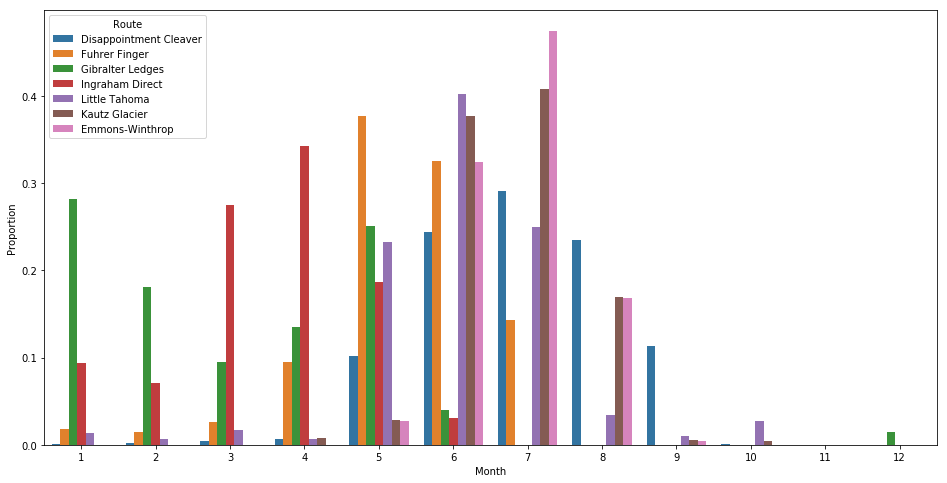

In [7]:
# Add month column to the data.
climb_data['Month'] = pd.to_numeric(climb_data['Date'].str.split('/').str[0])

# Create a new dataframe containing total summit attempts by month and route.
climb_data_by_month_route = climb_data.groupby(['Month','Route']).sum()['Attempted'].reset_index()

# We will plot only the seven most popular so the visual is uncluttered.
most_common_routes = climb_data_by_route.sort_values('Attempted').index[-7:]

# Create a dataframe which will house, for each route, the proportion of attempts falling on each month.
# We use proportion instead of abolute number so the heights of the bars are comparable.
route_popularity_by_month = climb_data_by_month_route[climb_data_by_month_route['Route'].isin(most_common_routes)]

# Join total attempts to compute proportion.
route_popularity_by_month = route_popularity_by_month \
    .join(climb_data_by_route,on='Route',rsuffix='_total') \
    .drop(columns=['Succeeded','Success Percentage'])

route_popularity_by_month['Proportion'] = route_popularity_by_month['Attempted'] / route_popularity_by_month['Attempted_total']

plt.figure(figsize=(16, 8))
sns.barplot(x='Month',y='Proportion',data=route_popularity_by_month,hue='Route')
plt.show()

This confirms our suspicion that route popularity varies with time. For example, Kautz Glacier and Emmons-Winthrop are quite popular during the summer, and they are the most successfully used summit routes. On the other hand, Gibralter Ledges and Ingraham Direct look like winter routes and they have lower success rates. We could view this as a kind of sampling bias. Once again, the route difficulty question feels ripe for experiment, but we have a whole nother (it's a word; I looked it up!) data set to explore: weather.

### ii. Weather Data

In [8]:
# taking a peek
weather_data.head()

,Date,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG
0,12/31/2015,13.845000,19.062917,21.870833,21.977792,62.325833,84.915292
1,12/30/2015,13.822917,14.631208,18.493833,3.540542,121.505417,86.192833
2,12/29/2015,13.834583,6.614292,34.072917,0.000000,130.291667,85.100917
3,12/28/2015,13.710417,8.687042,70.557917,0.000000,164.683750,86.241250
4,12/27/2015,13.362500,14.140417,95.754167,0.000000,268.479167,31.090708


Once again, we have more data cleaning to do. First, the data is devoid of units. Second, each datum is an average, but what we are averaging over is not mentioned. Is it the average over the course of the day? Over vaious weather stations? Both of these problems will require us to hunt for the original data source.

According to the Kaggle page, the data is taken from the Northwest Avalanche Center website, www.nwac.us. Their data portal contains weather data from five separate station from 2014 to 2019. Looking at the data directly from the source, we see that the units for battery voltage, temperature, relative humidity, wind speed, wind direction, and solar radiation are V, %, mph, deg, and W/m^2 respectively. Furthermore, some experimentation reveals that the averages are all with respect to time, and taken from the Camp Miur station. This is a reasonable choice since Camp Miur is by far the highest station, and most summit routes begin from there.

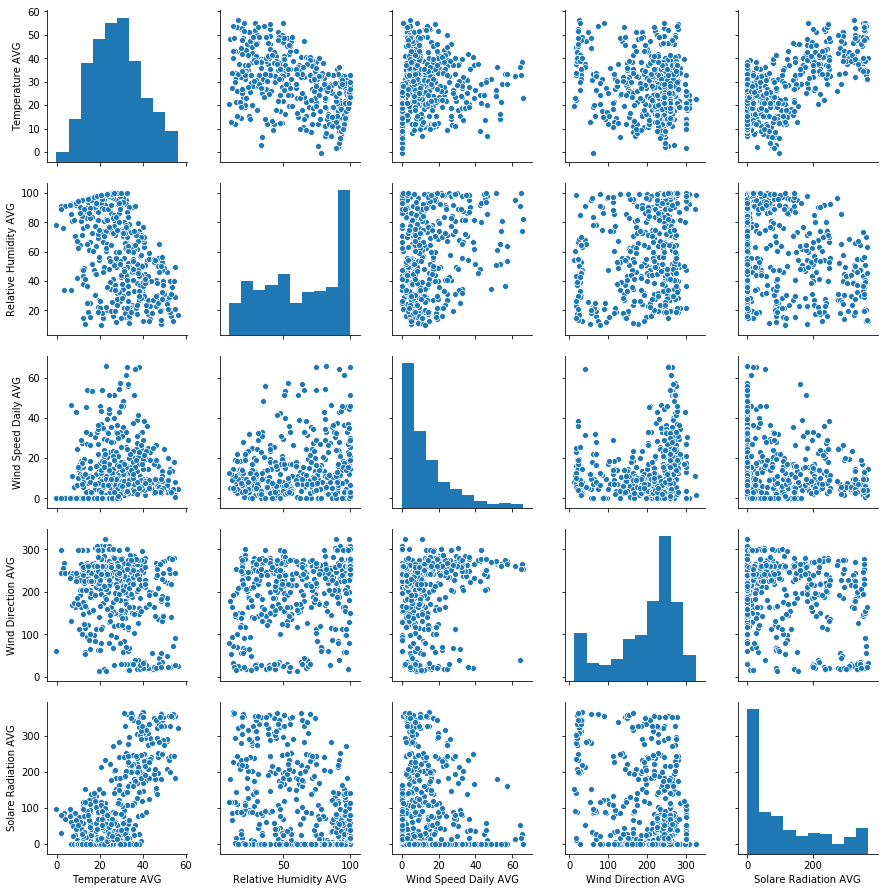

In [9]:
# First, let's get a sense of the distributions and relationships with a seaborn pairplot.
# Let's discard battery voltage, because that is irrelavent for our purposes.
weather_data.drop(columns=['Battery Voltage AVG'], inplace=True)
sns.pairplot(weather_data)

<b>Some observations about distributions. </b>

Temperature: approximately normal, centered at about 30 deg <br>
Humidity: approximately uniform except for peak at 100% <br>
Wind Speed: approximately exponential <br>
Wind Direction: approximately normal, centered at about 250 deg <br>
Solar Radiation: very loosely exponential

<b>Some observations about relationships.</b>

Temperature appears to decrease linearly with humidity and increase linearly with solar radiation. This makes sense as high humidity means clouds blotting out the sun, and less sun means less warmth. However, solar radiation surprisingly does not have a clear relationship with humidity, although there does appear to be a cluster around high humdity and low radiation. Temperature also loosly decreases with wind speed, as expected, and very loosely decreases with wind direction. Note: it's not really correct to say it decreases with wind direction since direction is not measured on an ordered scale. Rather it decreases with proximity to about 250 deg, the most common wind direction. I wonder if that is because the wind speed tends to be higher when blowing in that direction. The data bear this out remarkably well. Lastly, there is a slight correlation between between wind speed and humidity. Humid days are windier. Also between wind speed and solar radiation. Still days are brighter.

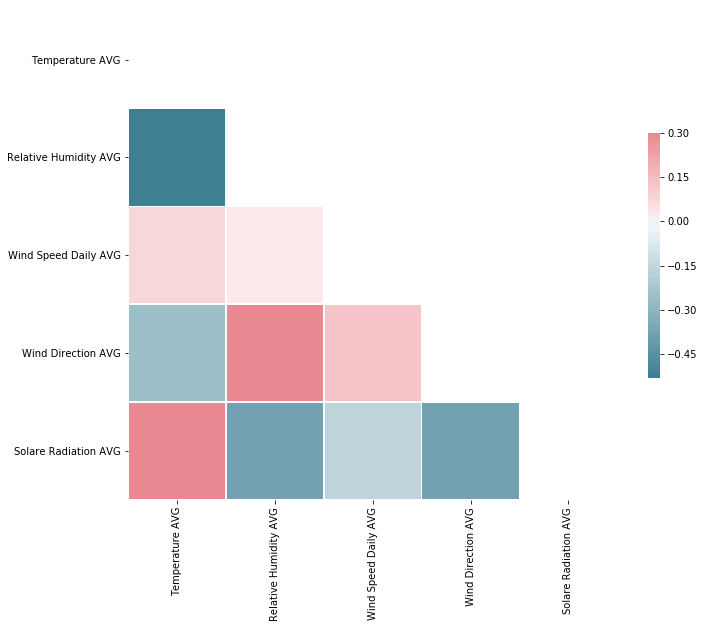

In [10]:
corr = weather_data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

The correlation heatmap confirms our observations. One surprise is the inverse correlation between solar radiation and humidity is stronger than it appears by inspecting the scatter plot.

Now let's put the data together and explore how the weather interacts with climbing.

In [11]:
climb_data_by_date = climb_data.groupby('Date').sum()[['Attempted','Succeeded']]
climb_data_by_date['Success Percentage'] = climb_data_by_date['Succeeded'] / climb_data_by_date['Attempted']

# Join the weather to the climbing data by date.
full_data_by_date = climb_data_by_date.join(weather_data.set_index('Date'))

# Unfortunately our datasets don't perfectly align, so we will just throw out the rows without weather and climbing data.
full_data_by_date.dropna(subset=['Temperature AVG'],inplace=True)

# Peak at full data.
full_data_by_date.head()

,Attempted,Succeeded,Success Percentage,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG
Date,,,,,,,,
1/23/2015,2,0,0.000000,28.251250,92.378750,20.887083,264.933333,0.00000
1/24/2015,8,0,0.000000,35.250833,59.772917,18.048458,271.591667,3.09375
1/25/2015,2,0,0.000000,37.742500,45.371667,41.440833,274.695833,0.00000
1/28/2015,2,2,1.000000,23.086250,22.535167,9.464208,207.667458,0.00000
1/29/2015,17,6,0.352941,24.574167,75.431250,7.395958,266.090833,0.00000


Temperature is a natural variable to compare with success rate. Generally, mountains are probably harder to climb in colder weather due to snow and physical discomfort. If we wanted to be more sophisticated, we could include the other weather variables (of course, it's not going to snow if it cold and cloudless), but the purpose of this project is to practice designing an experiment with a single treatment variable, so let's keep things simple and visualize the impact of temperature on success rate.

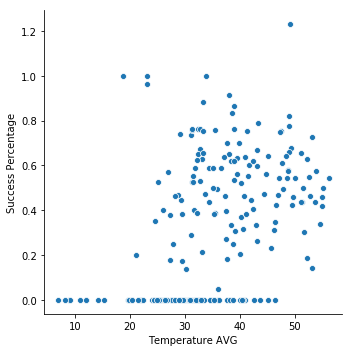

In [12]:
sns.relplot(x='Temperature AVG',y='Success Percentage',data=full_data_by_date)
plt.show()

As expected, higher temperature appears to correspond to higher success percentage. Below around 16 degrees, the success rate is zero. As an aside, there is a pesky point on the plot with a success percentage above 100%, so there is certainly some noise in this data. Let's test our visual inspection by calling the pandas correlation method.

In [13]:
# Pandas also sees a positive correlation.

full_data_by_date[['Temperature AVG','Success Percentage']].corr()

,Temperature AVG,Success Percentage
Temperature AVG,1.000000,0.423338
Success Percentage,0.423338,1.000000


## 2. Experiment

It is tempting to test the hypothesis that low temperatures reduce the likelihood of successfully making it to the Mt. Rainier summit. One reasonable approach might be to randomly assign climbers to different days and perform a logistic regression with temperature as our indepentent variable and whether the ascent was successful as our response variable. However, the purpose of this project is to practice proposing an elementary A/B test with a binary treatment variable. The temperature hypothesis isn't quite suited to this task for two reasons.
1. Temperature is a continuous, not binary variable. We could divide temperature into two categories, but this feels like fitting a square peg into a round hole, i.e., forcing the hypothesis to fit the experiment.
2. A/B tests are generally used when the independent variable is a "dial" that we can turn, but we have no control over the temperature. If we randomly assign climbers to two different days, how do we know that one day will fall into our "cool" category and the other into our "warm" category? We could do away with the idea of temperature categories and just select two days at random, testing whether the warmer day had significantly more successful ascents. However, the fact that we are not "setting" the temperature opens us up to confounding factors, hidden variables with causal connections to both temperature and success rate. This defeats the purpose of acquiring experimental rather than observational data.

A hypothesis which is more amenable to A/B testing is one that was asserted earlier in document via summitpost.org: that Ingraham Direct is an easier route than Gibralter Ledges. This hypothesis checks both boxes: the independent variable (route) is both binary and under our control.

<b> The hypothesis: </b>

Ingraham Direct is an easier path to the Mt. Rainier summit than Gibralter Ledges.

<b> The method of testing: </b>

Gather a group of as many climbers as we can convince to participate in our experiment. With hypothesis testing, the more the better. Randomly divide the climbers into two groups: a Gibralter group and an Ingraham Group. Send each group to the summit via their assigned route on the same day and at the same time. Record the number of success ascents within each group.

<b> The test statistic: </b>

We will define our null hypothesis to be that the probability of a random climber scaling Rainier does not depend on whether they take Ingraham or Gibralter. Our alternative hypothesis will be that the probability of reaching the summit is higher when Ingraham is taken. We will set our significance level at the standard 5%.

Let $\hat{p}$ be the number of successful climbers in our cohort overall and $\hat{q} = 1 - \hat{p}$, the number of failures. Let $\hat{p_1}$ and $\hat{p_2}$ be the proportion of successful climbers from the Ingraham and Gibralter group respectively. Let $m$ and $n$ be the size of the two groups respectively (these will be equal unless the total number of climbers is odd, in which case they'll differ by 1). Then we can define the test statistic
$$z = \frac{\hat{p_1}-\hat{p_2}}{\sqrt{\hat{p}\hat{q}(\frac{1}{m}+\frac{1}{n})}}.$$
This test statistic is approximately a z score. The standard rule of thumb for this approximation to be valid is $m\hat{p_1}, m\hat{q_1}, n\hat{p_2},$ and $n\hat{q_2}$ are all greater than 10. Hopefully this criterion was met be enlisting as many climbers as possible.

Finally, with z score in hand, we can look up the probability that a standard normal is larger than our computed $z$, and if this probability is less than 5%, we will accept summitpost.org's claim.

<b> Further research: </b> We could make our findings more robust by repeating this experiment on different days and in different conditions. Maybe the easier route changes depending on weather.